<a href="https://colab.research.google.com/github/cybermax47/CS-351-AI-Lab-Github-repository-2022447/blob/main/CS351_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sudoku Solver Program Description
This Sudoku Solver is a Python-based application designed to solve standard 9x9 Sudoku puzzles using the backtracking algorithm enhanced with constraint propagation. The program provides a user-friendly interface for entering a Sudoku puzzle and outputs the solution in a neatly formatted grid.

# Features:
**User Input:** Users can input their Sudoku puzzle row by row. The input accepts both continuous strings of digits and spaced digits, allowing for flexibility.
Empty cells can be represented by 0.

**Validation:** The program checks that each row contains exactly 9 digits (0-9) and ensures that the complete puzzle consists of 81 digits, enforcing the rules of Sudoku.

**Backtracking Algorithm:** The solver uses a recursive backtracking approach to explore possible placements for each empty cell. It intelligently backtracks when it encounters a conflict, ensuring that all Sudoku rules are adhered to.

**Constraint Propagation:** The solver implements constraint propagation techniques to reduce the number of possibilities for each empty cell, improving efficiency and speed.

**Output:** Upon solving the puzzle, the program displays the solution in a clear and visually appealing grid format. If the puzzle is unsolvable, it informs the user accordingly.

Enter your Sudoku puzzle row by row, using 0 for empty cells.
Row 1: 530070000
Row 2: 600195000
Row 3: 098000060
Row 4: 800060003
Row 5: 400803001
Row 6: 700020006
Row 7: 060000280
Row 8: 000419005
Row 9: 000080079

Solution:
 5   3   4   6 |  7   8   9 |  1   2 
 6   7   2   1 |  9   5   3 |  4   8 
 1   9   8   3 |  4   2   5 |  6   7 
---------+---------+---------
 8   5   9   7 |  6   1   4 |  2   3 
 4   2   6   8 |  5   3   7 |  9   1 
 7   1   3   9 |  2   4   8 |  5   6 
---------+---------+---------
 9   6   1   5 |  3   7   2 |  8   4 
 2   8   7   4 |  1   9   6 |  3   5 
 3   4   5   2 |  8   6   1 |  7   9 
Graph representation of the Sudoku puzzle:
Graph with 81 nodes and 810 edges


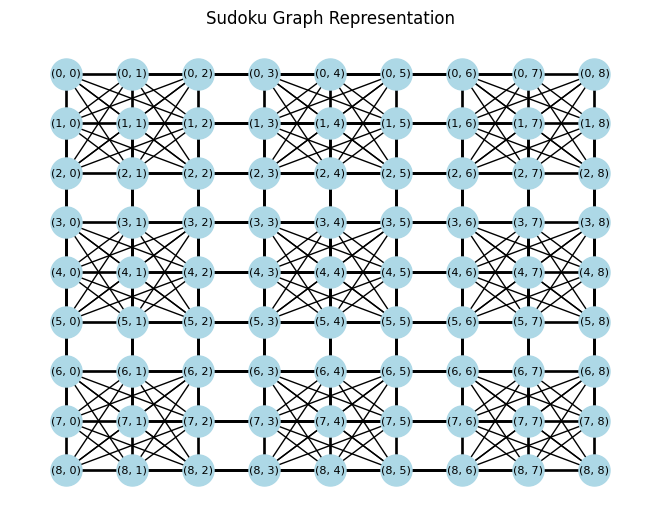

In [13]:
from copy import deepcopy

def parse_grid(grid):
    """Convert grid to a dictionary of possible values for each cell, mapping indices to labels."""
    values = {cell: set(range(1, 10)) for cell in cells}  # Map by label (e.g., 'A1', 'B3')
    for i, cell_value in enumerate(grid):
        if cell_value != 0:
            label = index_to_label(i)  # Convert integer index to label (e.g., 0 -> 'A1')
            if not assign(values, label, cell_value):
                return False  # Contradiction found
    return values

def index_to_label(index):
    """Convert a 0-based index (0-80) to a Sudoku cell label (e.g., 0 -> 'A1', 80 -> 'I9')."""
    rows = 'ABCDEFGHI'
    cols = '123456789'
    return rows[index // 9] + cols[index % 9]

def assign(values, cell, digit):
    """Assign a value to a cell, propagate constraints, and return False if a contradiction is found."""
    other_values = values[cell] - {digit}
    if all(eliminate(values, cell, d) for d in other_values):
        return values
    return False

def eliminate(values, cell, digit):
    """Eliminate a digit from a cell's possibilities and propagate constraints."""
    if digit not in values[cell]:
        return values  # Already eliminated

    values[cell].remove(digit)

    # If a cell has no more possible values, fail
    if len(values[cell]) == 0:
        return False

    # If a cell has only one possible value, assign it
    if len(values[cell]) == 1:
        remaining_digit = next(iter(values[cell]))
        if not all(eliminate(values, peer, remaining_digit) for peer in peers[cell]):
            return False

    # Check the unit: if a digit can only go in one cell, assign it
    for unit in units[cell]:
        places_for_digit = [c for c in unit if digit in values[c]]
        if len(places_for_digit) == 0:
            return False  # No place for the digit
        elif len(places_for_digit) == 1:
            if not assign(values, places_for_digit[0], digit):
                return False
    return values

def backtracking_search(values):
    """Use backtracking search to solve the Sudoku."""
    if all(len(values[cell]) == 1 for cell in cells):
        return values  # Solved

    # Choose the unfilled cell with the fewest possibilities
    n, cell = min((len(values[cell]), cell) for cell in cells if len(values[cell]) > 1)

    # Try each value in the cell
    for digit in values[cell]:
        new_values = deepcopy(values)  # Deep copy the current values to avoid mutation
        if assign(new_values, cell, digit):
            result = backtracking_search(new_values)
            if result:
                return result
    return False

# Define peers and units
def create_peers_and_units():
    """Create the peers and units for Sudoku cells."""
    rows = 'ABCDEFGHI'
    cols = '123456789'
    cells = [r + c for r in rows for c in cols]

    unitlist = ([cross(rows, c) for c in cols] +
                [cross(r, cols) for r in rows] +
                [cross(rs, cs) for rs in ('ABC', 'DEF', 'GHI') for cs in ('123', '456', '789')])

    units = {cell: [unit for unit in unitlist if cell in unit] for cell in cells}
    peers = {cell: set(sum(units[cell], [])) - {cell} for cell in cells}
    return peers, units, cells

def cross(A, B):
    """Cross product of elements in A and elements in B."""
    return [a + b for a in A for b in B]

# Initialize peers, units, and cells
peers, units, cells = create_peers_and_units()

def print_grid(values):
    """Print the Sudoku grid."""
    width = 3
    rows = 'ABCDEFGHI'
    cols = '123456789'

    # Create a grid from the values
    grid = []
    for r in rows:
        grid_row = []
        for c in cols:
            # Get the actual value instead of the set
            cell_value = [v for v in values[r + c] if v != 0]  # Only take non-zero values
            if len(cell_value) == 0:
                grid_row.append(' ')
            else:
                grid_row.append(str(cell_value[0]))  # Take the first value if available
        grid.append(grid_row)

    for r in range(9):
        line = '+'.join(['-' * (width * 3)] * 3)
        print(' '.join(grid[r][c].center(width) + ('|' if c in (3, 6) else '') for c in range(9)))
        if r in (2, 5):
            print(line)

def get_input():
    """Get the puzzle input from the user."""
    print("Enter your Sudoku puzzle row by row, using 0 for empty cells.")
    puzzle = []
    for i in range(9):
        row = input(f"Row {i + 1}: ")

        # Remove any spaces to handle both cases (with/without spaces)
        row = row.replace(' ', '')

        # Ensure the row contains exactly 9 digits
        if len(row) != 9 or not row.isdigit():
            print("Each row must contain exactly 9 numbers (0-9). Please try again.")
            return get_input()

        row_digits = [int(x) for x in row]
        puzzle.extend(row_digits)

    if len(puzzle) != 81:
        print("The puzzle must have exactly 81 digits. Please try again.")
        return get_input()

    return puzzle

# Example of running the solver with this input function
puzzle = get_input()

# Continue with the rest of the solution parsing and solving logic...
values = parse_grid(puzzle)
if not values:
    print("The puzzle has no solution (initial contradiction).")
else:
    solution = backtracking_search(values)

    # Print the solution
    if solution:
        print("\nSolution:")
        print_grid(solution)
    else:
        print("No solution exists.")


import networkx as nx
import matplotlib.pyplot as plt

def build_sudoku_graph():
    """Build a graph representation of the Sudoku puzzle."""
    G = nx.Graph()  # Create a new graph

    # Add nodes for each cell in the Sudoku grid
    for row in range(9):
        for col in range(9):
            node = (row, col)
            G.add_node(node)

            # Add edges for the same row and column
            for c in range(9):
                if c != col:
                    G.add_edge(node, (row, c))  # Row edges
            for r in range(9):
                if r != row:
                    G.add_edge(node, (r, col))  # Column edges

            # Add edges for the 3x3 subgrid
            start_row = (row // 3) * 3
            start_col = (col // 3) * 3
            for r in range(start_row, start_row + 3):
                for c in range(start_col, start_col + 3):
                    if (r, c) != node:  # Exclude the current cell
                        G.add_edge(node, (r, c))  # Subgrid edges

    return G

# Example usage
sudoku_graph = build_sudoku_graph()

# Print the graph representation
print("Graph representation of the Sudoku puzzle:")
print(sudoku_graph)

# Optionally, visualize the graph (this can take some time)
pos = {(row, col): (col, -row) for row in range(9) for col in range(9)}  # Position for visualization
nx.draw(sudoku_graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
plt.title("Sudoku Graph Representation")
plt.show()
